In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import warnings
import time
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

## Considering basic numeric features

In [3]:
app_num_basic_col = [
'SK_ID_CURR',
'default',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY']

In [4]:
app_cat_basic_col = ['NAME_CONTRACT_TYPE',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CODE_GENDER',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'OCCUPATION_TYPE',
'ORGANIZATION_TYPE']

In [5]:
len(app_num_basic_col)

21

In [6]:
len(app_cat_basic_col)

11

## Creating dataframe with required columns only

In [7]:
df = df[app_num_basic_col + app_cat_basic_col]

In [8]:
df.shape

(140000, 32)

In [9]:
df['default'].value_counts()

0    128705
1     11295
Name: default, dtype: int64

## Missing Values

In [10]:
def find_missing(data):
    ## Number of missing values
    missing_cnt = data.isnull().sum().values
    ## Total
    total = data.shape[0]
    ##Percentage of Missing values
    percentage = missing_cnt/total * 100
    missing_df = pd.DataFrame(data={'Total': total, 'Missing Count' : missing_cnt,'Percentage' : percentage}, 
                              index=data.columns.values)
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    return missing_df

In [11]:
find_missing(df[app_num_basic_col])

,Total,Missing Count,Percentage
AMT_GOODS_PRICE,140000,127,0.090714
AMT_ANNUITY,140000,7,0.005000
CNT_FAM_MEMBERS,140000,1,0.000714


In [12]:
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median())
df['AMT_ANNUITY']=df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median())
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median())


In [13]:
find_missing(df[app_num_basic_col])

,Total,Missing Count,Percentage


In [14]:
find_missing(df[app_cat_basic_col])

,Total,Missing Count,Percentage
OCCUPATION_TYPE,140000,43939,31.385000
NAME_TYPE_SUITE,140000,601,0.429286


In [15]:
df.OCCUPATION_TYPE.unique()

array(['Core staff', 'Accountants', nan, 'Laborers', 'Sales staff',
       'Drivers', 'Cooking staff', 'Private service staff', 'Managers',
       'Medicine staff', 'Low-skill Laborers', 'Secretaries',
       'High skill tech staff', 'Waiters/barmen staff', 'Security staff',
       'Cleaning staff', 'Realty agents', 'HR staff', 'IT staff'],
      dtype=object)

In [16]:
df.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Children', 'Family', 'Spouse, partner',
       'Other_B', 'Other_A', nan, 'Group of people'], dtype=object)

In [17]:
app_cat_basic_col.remove('OCCUPATION_TYPE')

In [18]:
df.drop('OCCUPATION_TYPE',inplace=True, axis=1)

In [19]:
df.shape

(140000, 31)

In [20]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('NTS_XNA')

## Combining basic features from numerical and categorical

In [21]:
basic_features = app_num_basic_col + app_cat_basic_col 

In [22]:
len(basic_features)

31

In [23]:
find_missing(df[basic_features])

,Total,Missing Count,Percentage


### Handling Outlier

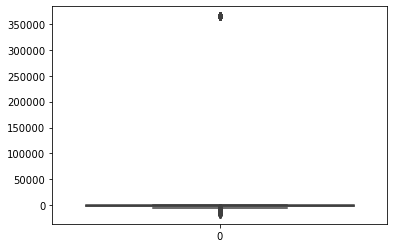

In [24]:
sns.boxplot(data=df['DAYS_EMPLOYED'])

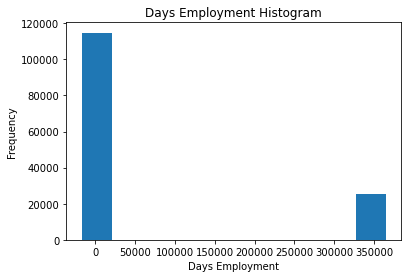

In [25]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

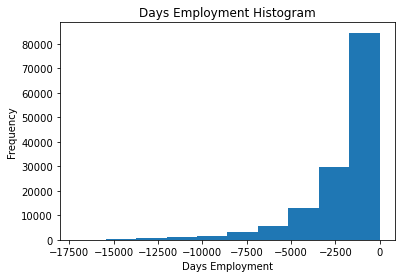

In [26]:
import numpy as np

# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median())

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [27]:
df[df['DAYS_EMPLOYED'] / -365 > 8]['DAYS_EMPLOYED'].count()

32549

In [28]:
(df['DAYS_BIRTH'] / -365).describe()

count    140000.000000
mean         43.923315
std          11.939668
min          20.517808
25%          33.994521
50%          43.167123
75%          53.893151
max          69.043836
Name: DAYS_BIRTH, dtype: float64

In [29]:
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,default,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
17645,144669,0,2,157500.0,270000.0,13500.0,225000.0,0.026392,-13717,-2797.0,...,Revolving loans,N,Y,XNA,Family,Working,Secondary / secondary special,Married,House / apartment,Industry: type 3
38251,196708,0,1,135000.0,405000.0,20250.0,225000.0,0.035792,-10647,-1228.0,...,Revolving loans,N,Y,XNA,Unaccompanied,Working,Higher education,Married,House / apartment,Kindergarten
86712,319880,0,0,247500.0,540000.0,27000.0,900000.0,0.035792,-9649,-2293.0,...,Revolving loans,Y,Y,XNA,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,Medicine


In [30]:
df = df[df['CODE_GENDER'] != 'XNA']

In [31]:
df.shape

(139997, 31)

## Lable encoding for categorical features

In [32]:
df[['SK_ID_CURR','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'DAYS_EMPLOYED']].head(10)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_EMPLOYED
0,100007,M,N,Y,-3038.0
1,100009,F,Y,Y,-3130.0
2,100011,F,N,Y,-1647.0
3,100014,F,N,Y,-679.0
4,100015,F,N,Y,-1647.0
5,100016,F,N,Y,-2717.0
6,100018,F,N,Y,-203.0
7,100019,M,Y,Y,-1157.0
8,100021,F,N,Y,-191.0
9,100025,F,Y,Y,-1652.0


In [33]:
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'DAYS_EMPLOYED']:
    df[bin_feature], uniques = pd.factorize(df[bin_feature])

In [34]:
df[['SK_ID_CURR','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'DAYS_EMPLOYED']].head(10)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_EMPLOYED
0,100007,0,0,0,0
1,100009,1,1,0,1
2,100011,1,0,0,2
3,100014,1,0,0,3
4,100015,1,0,0,2
5,100016,1,0,0,4
6,100018,1,0,0,5
7,100019,0,1,0,6
8,100021,1,0,0,7
9,100025,1,1,0,8


### Out of above basic categorical features we already encoded binary

- FLAG_OWN_CAR
- FLAG_OWN_REALITY
- CODE_GENDER
- DAYS_EMPLYED_ANOM

### Now doing one hot encoding for remaining features

- NAME_CONTRACT_TYPE
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- ORGANIZATION_TYPE

In [35]:
one_hot_encode_col = ['NAME_CONTRACT_TYPE',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'ORGANIZATION_TYPE']

In [36]:
dummy_df = pd.get_dummies(df[one_hot_encode_col], dummy_na=False, drop_first=True)

In [37]:
len(dummy_df.columns)

86

In [38]:
df.shape

(139997, 31)

In [39]:
len(basic_features)

31

In [40]:
df.drop(one_hot_encode_col, axis=1,inplace=True)

In [41]:
for f in one_hot_encode_col:
    basic_features.remove(f)

In [42]:
len(basic_features)

24

In [43]:
df.shape

(139997, 24)

### Creating final dataframe with required features

In [44]:
len(df[basic_features].columns)

24

In [45]:
len(dummy_df.columns)

86

In [46]:
df = pd.concat([df[basic_features], dummy_df], axis=1)

In [47]:
del dummy_df
gc.collect()

6528

In [48]:
df.shape
df.head()

,SK_ID_CURR,default,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,0,...,0,0,0,0,0,0,0,0,0,0
1,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,1,...,0,0,0,0,0,0,0,0,0,0
2,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,2,...,0,0,0,0,0,0,0,0,0,1
3,100014,0,1,112500.000,652500.0,21177.0,652500.0,0.022800,-10197,3,...,0,0,0,0,0,0,0,0,0,0
4,100015,0,0,38419.155,148365.0,10678.5,135000.0,0.015221,-20417,2,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df.describe()

,SK_ID_CURR,default,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,139997.000000,139997.000000,139997.000000,1.399970e+05,1.399970e+05,139997.000000,1.399970e+05,139997.000000,139997.000000,139997.000000,...,139997.000000,139997.000000,139997.000000,139997.000000,139997.000000,139997.000000,139997.00000,139997.000000,139997.000000,139997.000000
mean,277562.827168,0.080680,0.416480,1.695811e+05,5.992930e+05,27108.005689,5.386099e+05,0.020889,-16032.110510,2434.442667,...,0.000214,0.000171,0.002064,0.025593,0.000664,0.007122,0.00385,0.017086,0.004422,0.180125
std,102728.186302,0.272344,0.721362,3.318194e+05,4.022535e+05,14491.144284,3.690488e+05,0.013811,4357.963905,2369.942490,...,0.014637,0.013092,0.045388,0.157919,0.025766,0.084089,0.06193,0.129593,0.066348,0.384293
min,100007.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1993.500000,4.050000e+04,0.000290,-25201.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,188463.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16546.500000,2.385000e+05,0.010006,-19671.000000,378.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,277319.000000,0.000000,0.000000,1.485000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,-15756.000000,1857.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,366323.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12409.000000,3779.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,456253.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,10711.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### DecisionTree

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
X = df.drop('default',axis=1)
y = df['default']
print(X.shape)
print(y.shape)

(139997, 109)
(139997,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=27)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (97997, 109)
Number transactions y_train dataset:  (97997,)
Number transactions X_test dataset:  (42000, 109)
Number transactions y_test dataset:  (42000,)


In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict_proba(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     38585
           1       0.11      0.12      0.12      3415

    accuracy                           0.85     42000
   macro avg       0.52      0.52      0.52     42000
weighted avg       0.86      0.85      0.85     42000



In [54]:
import sklearn
print('AUPRC = {}'.format(sklearn.metrics.roc_auc_score(y_test, dt_pred)))

AUPRC = 0.5172988615767399


### Random forests

In [55]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict_proba(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[38585     0]
 [ 3415     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     38585
           1       0.00      0.00      0.00      3415

    accuracy                           0.92     42000
   macro avg       0.46      0.50      0.48     42000
weighted avg       0.84      0.92      0.88     42000



In [56]:
print('AUPRC = {}'.format(sklearn.metrics.roc_auc_score(y_test, rfc_pred)))

AUPRC = 0.5


### But data is not balanced

0    128702
1     11295
Name: default, dtype: int64

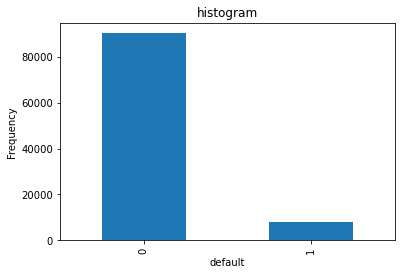

In [57]:
pd.value_counts(y_train).plot.bar()
plt.title('histogram')
plt.xlabel('default')
plt.ylabel('Frequency')
df['default'].value_counts()

In [58]:
from imblearn.over_sampling import SMOTE

Number transactions X_train dataset:  (180234, 109)
Number transactions y_train dataset:  (180234,)
Number transactions X_test dataset:  (42000, 109)
Number transactions y_test dataset:  (42000,)


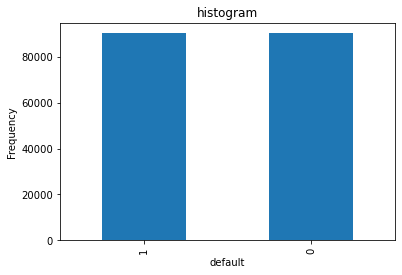

In [70]:
sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
pd.value_counts(y_train_sm).plot.bar()
plt.title('histogram')
plt.xlabel('default')
plt.ylabel('Frequency')

print("Number transactions X_train dataset: ", X_train_sm.shape)
print("Number transactions y_train dataset: ", y_train_sm.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [60]:
dtree.fit(X_train_sm,y_train_sm)
predictions = dtree.predict_proba(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     38585
           1       0.10      0.14      0.12      3415

    accuracy                           0.83     42000
   macro avg       0.51      0.51      0.51     42000
weighted avg       0.85      0.83      0.84     42000



In [61]:
rfc.fit(X_train_sm, y_train_sm)

rfc_pred = rfc.predict_proba(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[38425   160]
 [ 3391    24]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     38585
           1       0.13      0.01      0.01      3415

    accuracy                           0.92     42000
   macro avg       0.52      0.50      0.48     42000
weighted avg       0.85      0.92      0.88     42000



### Standardisation 

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
df_x = pd.DataFrame(X_test_std)
df_x.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-0.133374,-0.578800,-0.262457,-0.580825,-0.649515,-0.603910,-0.161762,-1.668799,-1.025590,-0.041278,...,-0.014287,-0.014287,-0.044652,-0.16223,-0.026736,-0.083653,-0.061979,-0.129853,-0.065529,2.135664
1,1.667250,0.809676,-0.204894,-0.961369,-0.910150,-0.883638,0.400880,0.952187,-0.987202,-0.279473,...,-0.014287,-0.014287,-0.044652,-0.16223,-0.026736,-0.083653,-0.061979,-0.129853,-0.065529,-0.468238
2,1.608854,-0.578800,-0.032205,-0.927878,-0.334955,-0.847152,0.400880,-0.415444,1.146071,-0.413722,...,-0.014287,-0.014287,-0.044652,-0.16223,-0.026736,-0.083653,-0.061979,-0.129853,-0.065529,-0.468238
3,-1.050896,-0.578800,0.140483,-0.927878,-1.092688,-0.847152,0.848281,1.370508,-0.683051,-0.075548,...,-0.014287,-0.014287,-0.044652,-0.16223,-0.026736,-0.083653,-0.061979,-0.129853,-0.065529,-0.468238
4,0.702251,-0.578800,-0.204894,-1.095331,-1.325121,-1.029583,-0.717876,-0.098319,0.708195,-1.187784,...,-0.014287,-0.014287,-0.044652,-0.16223,-0.026736,-0.083653,-0.061979,-0.129853,-0.065529,-0.468238


Text(0, 0.5, 'Frequency')

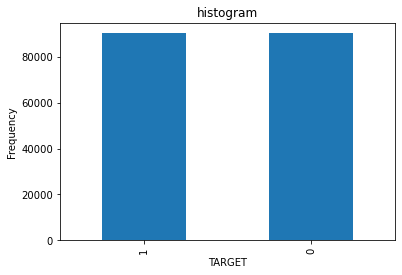

In [63]:
sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(X_train_std, y_train)
pd.value_counts(y_train_sm).plot.bar()
plt.title('histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')

In [64]:
dtree.fit(X_train_sm,y_train_sm)
predictions = dtree.predict_proba(X_test_std)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     38585
           1       0.11      0.17      0.13      3415

    accuracy                           0.82     42000
   macro avg       0.51      0.52      0.51     42000
weighted avg       0.86      0.82      0.84     42000



In [65]:
print('AUPRC = {}'.format(sklearn.metrics.roc_auc_score(y_test, predictions)))

AUPRC = 0.5211669924607895


In [66]:
rfc.fit(X_train_sm, y_train_sm)

rfc_pred = rfc.predict_proba(X_test_std)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))


[[38227   358]
 [ 3342    73]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38585
           1       0.17      0.02      0.04      3415

    accuracy                           0.91     42000
   macro avg       0.54      0.51      0.50     42000
weighted avg       0.86      0.91      0.88     42000



In [67]:
print('AUPRC = {}'.format(sklearn.metrics.roc_auc_score(y_test, rfc_pred)))

AUPRC = 0.5060490320945314


## Saving Output

In [71]:
test_output = pd.DataFrame({'SK_ID_CURR':X_test.SK_ID_CURR.values, 'default':rfc_pred})
test_output.head()

,SK_ID_CURR,default
0,263888,0
1,448929,0
2,442928,0
3,169599,0
4,349761,0


In [72]:
test_output.to_csv('Output2', index = False)